 ### min f(x,y) = arctan(x^2 + y^2) / (1 + x^2)
 #### Autor: Agustin A. Carbajal Romero | Grupo C-312

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm, inv

np.set_printoptions(precision=6, suppress=True)
print('Se ha importado correctamente numpy y matplotlib.')

Se ha importado correctamente numpy y matplotlib.


##### 1-Definición de la función y su gradiente

In [7]:
def f(x):
    x1, x2 = x
    return np.arctan(x1**2 + x2**2) / (1 + x1**2)

def grad_f(x):
    x1, x2 = x
    denom = (1 + x1**2)
    num = 2 * np.array([
        (x1 * ((1 + x1**2) / (1 + (x1**2 + x2**2)**2) - np.arctan(x1**2 + x2**2)))/denom,
        (x2 / (1 + (x1**2 + x2**2)**2))/denom
    ])
    return num

##### 2-Método de Máximo Descenso (Gradiente) con Armijo

In [8]:
def gradiente_armijo(f, grad_f, x0, tol=1e-6, maxiter=10, alpha=1.0, beta=0.5, sigma=1e-4):
    x = np.array(x0, dtype=float)
    it = 0
    hist = [x.copy()]
    while norm(grad_f(x)) > tol and it < maxiter:
        d = -grad_f(x)
        t = alpha
        # Regla de Armijo
        while f(x + t * d) > f(x) + sigma * t * np.dot(grad_f(x), d):
            t *= beta
        x += t * d
        hist.append(x.copy())
        it += 1
    return x, f(x), it, np.array(hist)

##### 3-Método de Newton Regularizado

In [9]:
def hessiana_num(f, x, eps=1e-5):
    n = len(x)
    H = np.zeros((n, n))
    fx = f(x)
    for i in range(n):
        for j in range(n):
            e_i = np.zeros(n); e_j = np.zeros(n)
            e_i[i], e_j[j] = eps, eps
            H[i,j] = (f(x + e_i + e_j) - f(x + e_i) - f(x + e_j) + fx) / (eps**2)
    return H

def newton_reg(f, grad_f, x0, tol=1e-6, maxiter=10, lam=1e-3):
    x = np.array(x0, dtype=float)
    it = 0
    hist = [x.copy()]
    while norm(grad_f(x)) > tol and it < maxiter:
        H = hessiana_num(f, x)
        H_reg = H + lam * np.eye(len(x))
        try:
            dx = -inv(H_reg) @ grad_f(x)
        except np.linalg.LinAlgError:
            dx = -grad_f(x)  # fallback
        x += dx
        hist.append(x.copy())
        it += 1
    return x, f(x), it, np.array(hist)

### Ejecución individual de los métodos

In [10]:
try:
    x1_input = float(input("Ingrese el valor inicial de x1: "))
    x2_input = float(input("Ingrese el valor inicial de x2: "))
    x0 = np.array([x1_input, x2_input])
except:
    print("Entrada no válida. Se usará el punto inicial por defecto (2,3).")
    x0 = np.array([2.0, 3.0])

xg, fg, itg, hg = gradiente_armijo(f, grad_f, x0)
xn, fn, itn, hn = newton_reg(f, grad_f, x0)

print(f"Gradiente con Armijo -> x*={xg}, f(x*)={fg:.8f}, iter={itg}")
print(f"Newton Regularizado -> x*={xn}, f(x*)={fn:.8f}, iter={itn}")

Gradiente con Armijo -> x*=[14.37222  0.     ], f(x*)=0.00754456, iter=10
Newton Regularizado -> x*=[307.671239  -0.003109], f(x*)=0.00001659, iter=10


##### Estrategia combinada de Gradiente Descendente+Newton

In [11]:
x0_combo = x0.copy()
x_temp, f_temp, it_temp, h_temp = gradiente_armijo(f, grad_f, x0_combo, tol=1e-3)
x_final, f_final, it_final, h_final = newton_reg(f, grad_f, x_temp)

h_combo = np.vstack((h_temp, h_final))

print(f"\nMétodo Combinado (Gradiente→Newton):")
print(f"Iteraciones totales: {len(h_combo)}")
print(f"Resultado final: x*={x_final}, f(x*)={f_final:.8f}")



Método Combinado (Gradiente→Newton):
Iteraciones totales: 22
Resultado final: x*=[308.298675   0.001543], f(x*)=0.00001653


##### Visualizacion de los metodos en el punto escogido

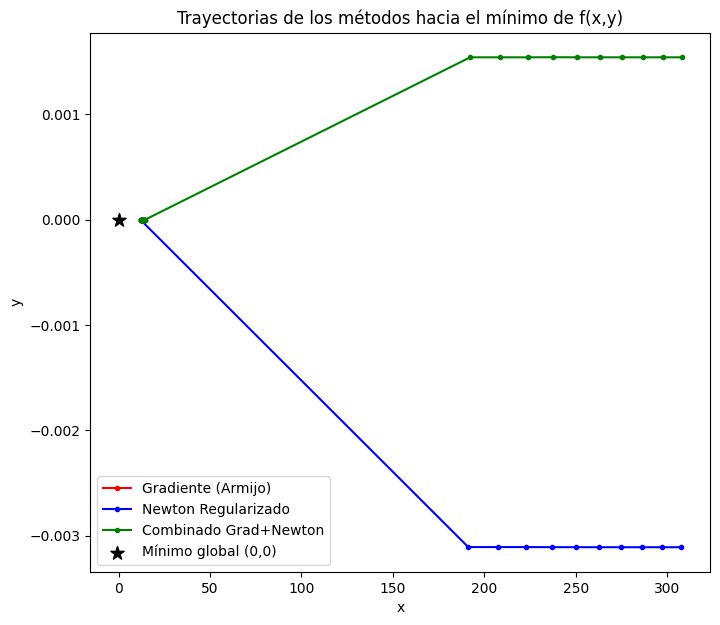

In [12]:
X = np.linspace(-3, 3, 300)
Y = np.linspace(3, 3, 300)
X, Y = np.meshgrid(X, Y)
Z = np.arctan(X**2 + Y**2) / (1 + X**2)

plt.figure(figsize=(8,7))
#plt.contour(X, Y, Z, levels=30, cmap="viridis")
plt.plot(hg[:,0], hg[:,1], 'r.-', label="Gradiente (Armijo)")
plt.plot(hn[:,0], hn[:,1], 'b.-', label="Newton Regularizado")
plt.plot(h_combo[:,0], h_combo[:,1], 'g.-', label="Combinado Grad+Newton")
plt.scatter(0, 0, c='black', marker='*', s=100, label="Mínimo global (0,0)")
plt.title("Trayectorias de los métodos hacia el mínimo de f(x,y)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

 ##### Evolución del valor de la función por iteración

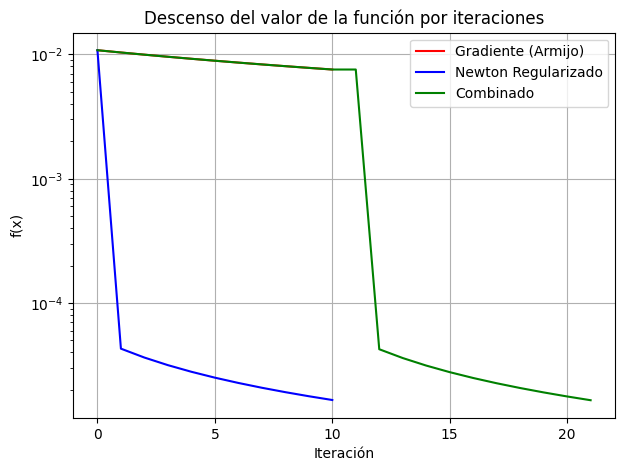

In [15]:
plt.figure(figsize=(7,5))
plt.plot([f(p) for p in hg], 'r-', label="Gradiente (Armijo)")
plt.plot([f(p) for p in hn], 'b-', label="Newton Regularizado")
plt.plot([f(p) for p in h_combo], 'g-', label="Combinado")
plt.yscale('log')
plt.xlabel("Iteración")
plt.ylabel("f(x)")
plt.title("Descenso del valor de la función por iteraciones")
plt.legend()
plt.grid(True)
plt.show()